In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

In [4]:
subject_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12', '13']

In [10]:
wli = []
bli = []
for subject_id in subject_list:
    dir_path = f"analyses_results/sub-{subject_id}/mvpa/correlations/"
    wc = pd.read_csv(dir_path+'within_correlations.csv')
    wc['participant_id'] = subject_id
    wli.append(wc)

    bc = pd.read_csv(dir_path+'between_correlations.csv')
    bc['participant_id'] = subject_id
    bli.append(bc)
within_correlations = pd.concat(wli).drop('Unnamed: 0', axis = 1)
between_correlations = pd.concat(bli).drop('Unnamed: 0', axis = 1)

In [12]:
within_correlations_melt = within_correlations.melt(id_vars=['participant_id', 'runs', 'block_type', 'ROIs'], var_name = 'correlations', value_name='corr')

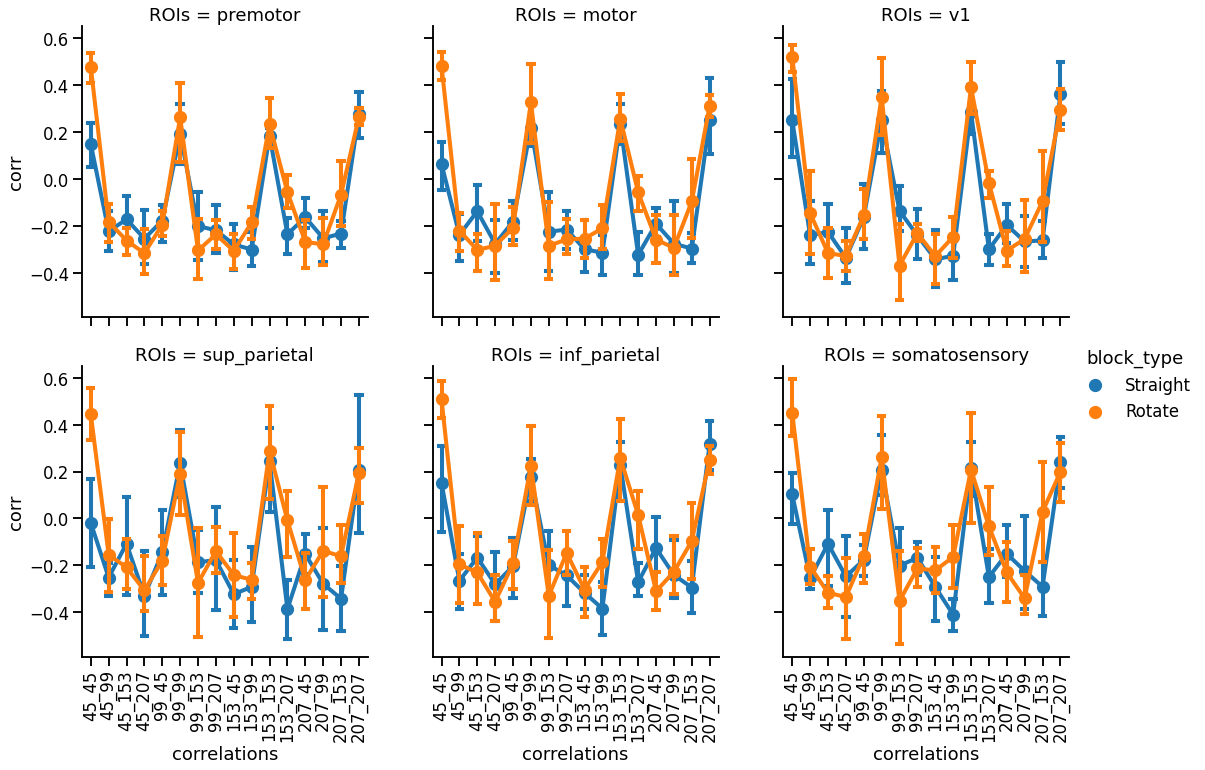

In [70]:
ax = sns.catplot(x = 'correlations', y = 'corr', hue = 'block_type',  col = 'ROIs', col_wrap=3,
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02'))])
ax.set_axis_labels().set_xticklabels(rotation = 90)
plt.savefig('plots_for_bb/within_correlations/within_corr_dir_pairs_all.png', dpi = 600)

In [19]:
away = []
for i in within_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
within_correlations_melt['targets_away'] = away

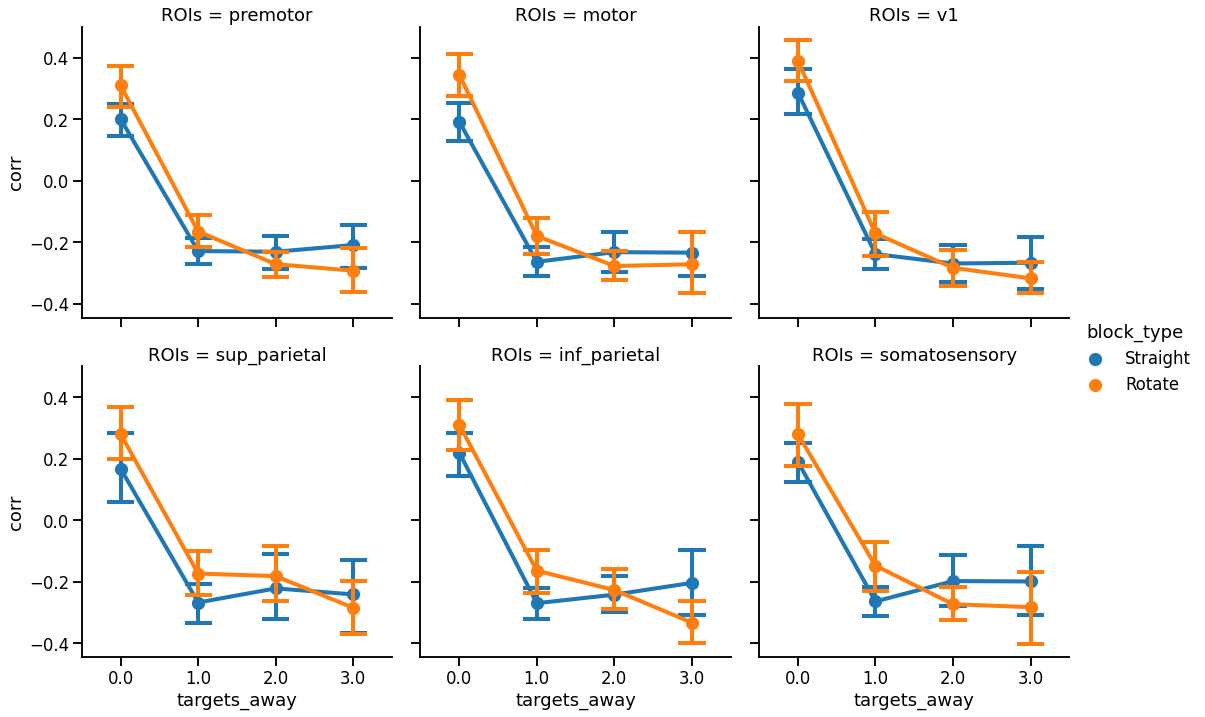

In [63]:
sns.set_context('talk')
sns.catplot(x = 'targets_away', y = 'corr', hue = 'block_type',col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02'))])
plt.savefig('plots_for_bb/within_correlations/within_corr_targ_away_all.png', dpi = 600)

# Between Blocks

In [25]:
between_correlations_melt = between_correlations.melt(id_vars=['participant_id', 'run_pairs', 'ROIs'], var_name = 'correlations', value_name='corr')

In [26]:
away = []
for i in between_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
between_correlations_melt['targets_away'] = away

In [31]:
aim = []
for i in between_correlations_melt.correlations.str.split('_').values:
    aim.append((int(i[0]) - (int(i[1]) - 90)))
between_correlations_melt['aim_diff'] = aim

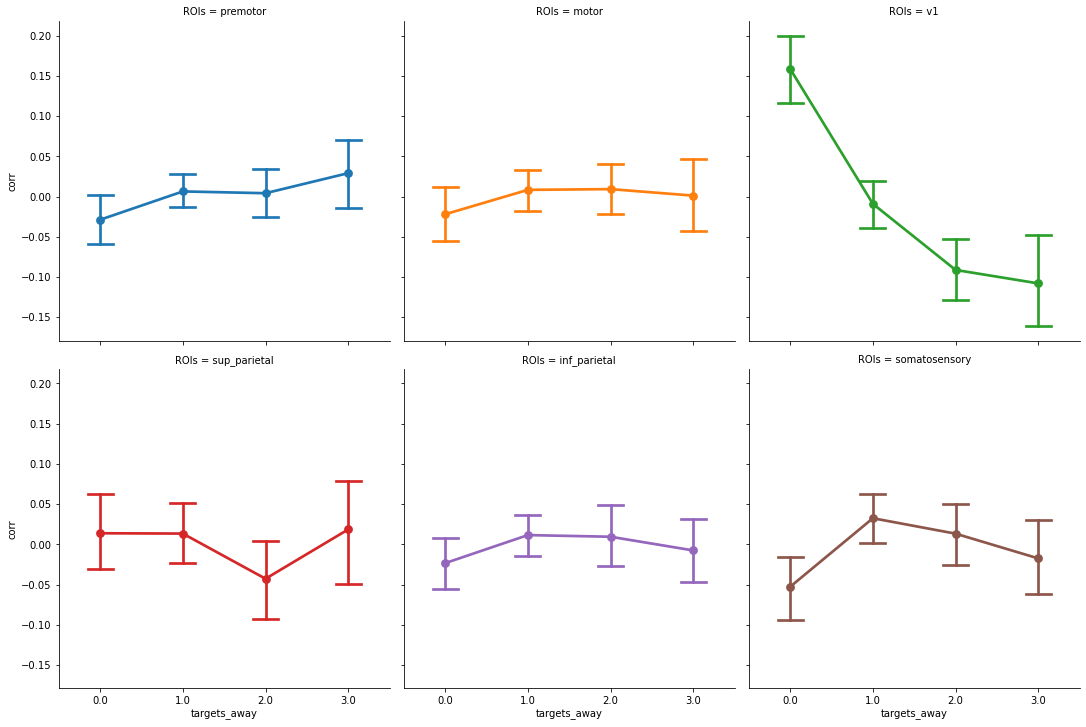

In [29]:
sns.catplot(x = 'targets_away', y = 'corr', hue = 'ROIs', col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt[between_correlations_melt.run_pairs <=1])

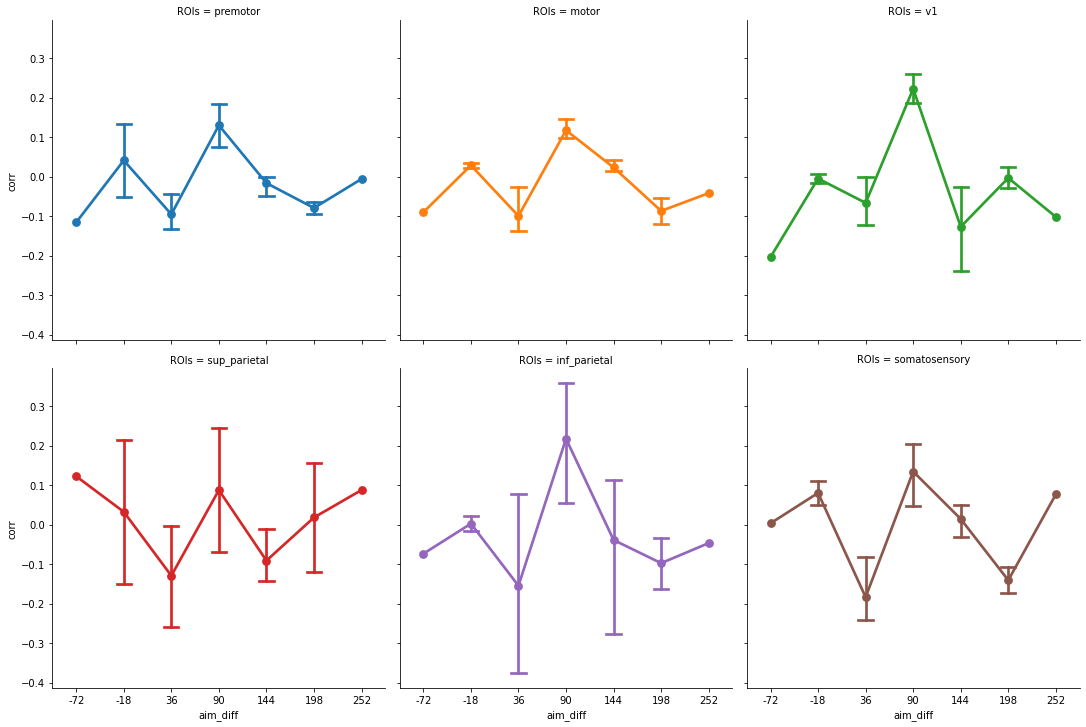

In [55]:
sns.catplot(x = 'aim_diff', y = 'corr', hue = 'ROIs', col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt.loc[((between_correlations_melt.participant_id == '02') & (between_correlations_melt.run_pairs == 2))])
#plt.savefig('plots_for_bb/aim_diff_all_participants_first_pair.png', dpi = 600)